## Exercise 9 - Numerical methods

Marit Svendby Otervik

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy import fftpack

### 1. 2D minimization of a six-hump camelback function

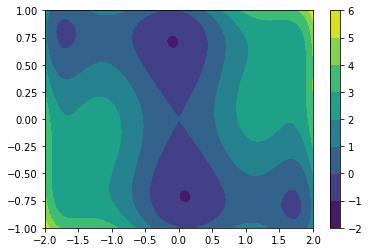

In [2]:
def f(params):
    x,y = params
    return (4-2.1*x**2+x**4/3)*x**2 + x*y + (4*y**2-4)*y**2

x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)

xx,yy = np.meshgrid(x,y)
z = f([xx,yy])
plt.contourf(x,y,z)
#plt.imshow(z)
plt.colorbar()
plt.show()

From this plot, the initial guesses are (0,75) and (0,-75)

In [3]:
init_pos = [0,0.75]
init_neg = [0,-0.75]

solution_pos = optimize.minimize(f,init_pos)
solution_neg = optimize.minimize(f,init_neg)
print("Global minima:")
print(solution_pos.x)
print(solution_neg.x)

Global minima:
[-0.08984201  0.71265641]
[ 0.08984201 -0.71265641]


Initial guess of (x,y)=(0,0):

       fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


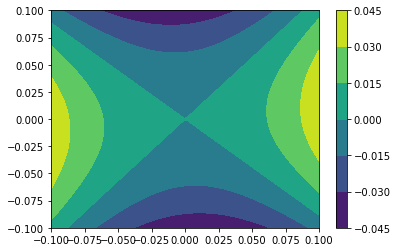

In [4]:
solution_zero = optimize.minimize(f,[0,0])
print("Initial guess of (x,y)=(0,0):\n\n",solution_zero)

x = np.linspace(-0.1,0.1,100)
y = np.linspace(-0.1,0.1,100)

xx,yy = np.meshgrid(x,y)
z = f([xx,yy])
plt.contourf(x,y,z)
plt.colorbar()
plt.show()

We see here that an initial guess of (x,y) = (0,0) returns the initial guess. In addition, we can see that the number of iterations ("nit") are zero, meaning that the minimization didn't run as wanted. This is probably because (0,0) is a local minima. We can see clearly from the plot above that this point is like a saddle point. Hence, the function gets "trapped" in this local minima, not being able to find a global minima. This problem can be solved using basinhopping, taking i random step to go over most of the minimas. This method will find the same global minima as above:

In [5]:
from scipy.optimize import basinhopping

x0 = [0,0]
solution_bh = basinhopping(f,x0,stepsize = 0.1)
print("Initial guess of (x,y)=(0,0) using basinhopping:\n",solution_bh.x)

Initial guess of (x,y)=(0,0) using basinhopping:
 [ 0.08984201 -0.71265641]


### 2. Non-linear ODE: the damped pendulum

In [6]:
from scipy.integrate import odeint

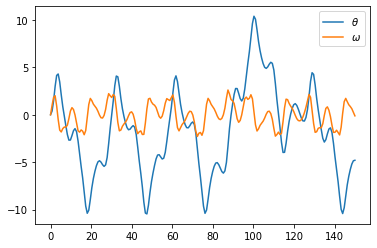

In [7]:
def derivative(X, t, Q, d, omega):
    return (X[1], -X[1]/Q + np.sin(X[0]) + d*np.cos(omega*t))

t = np.linspace(0,150,200) 
Xinit = (0,0)
Q = 2.0
d = 1.5
omega = 0.65

X = odeint(derivative, Xinit, t, args=(Q, d, omega))

plt.figure()
plt.plot(t,X[:,0], label = r"$\theta$")
plt.plot(t,X[:,1], label = r"$\omega$" )
plt.legend()
plt.show()

### 3. FFT of a simple dataset

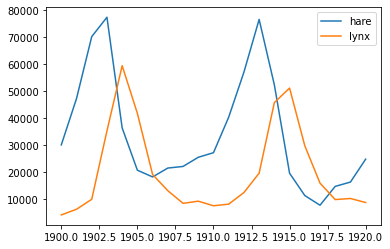

In [8]:
data = pd.read_csv('data/populations.txt', sep=('\t'))

hare = data['hare'].to_numpy()
lynx = data['lynx'].to_numpy()

time_step = 1
time_vec = np.arange(1900,1921)

plt.figure()
plt.plot(time_vec, hare, label = "hare")
plt.plot(time_vec, lynx, label = "lynx")
plt.legend()
plt.show()

In [9]:
def find_period(population):
    fft = fftpack.fft(population)
    power = np.abs(fft)
    sample_freq = fftpack.fftfreq(population.size, d=time_step)
    
    pos_mask = np.where(sample_freq>0)
    freqs = sample_freq[pos_mask]
    powes = power[pos_mask]
    peak_freq = freqs[powes.argmax()]
    period = 1/peak_freq
    
    return period

In [10]:
period_hare = find_period(hare)
period_lynx = find_period(lynx)

print("Period of hare population:",period_hare, "years")
print("Period of lynx population:",period_lynx, "years")

Period of hare population: 10.5 years
Period of lynx population: 10.5 years


The calculated period of the population of the two animals seems reasonable compared to the plot above. 

### 4. FFT of an image

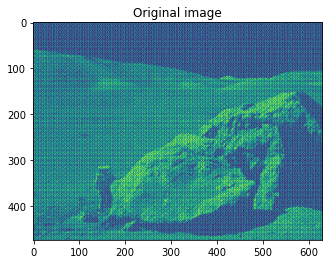

In [11]:
im = plt.imread("images/moonlanding.png")
plt.figure()
plt.title("Original image")
plt.imshow(im)
plt.show()

In [12]:
fft_im = fftpack.fft2(im)

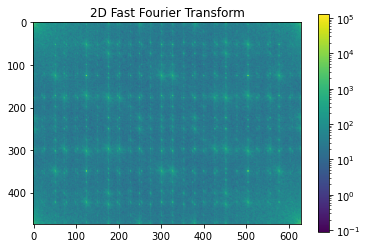

In [13]:
from matplotlib.colors import LogNorm
plt.figure()
plt.title("2D Fast Fourier Transform")
plt.imshow(np.abs(fft_im), norm=LogNorm())
plt.colorbar()
plt.show()

In [14]:
keep_fraction = 0.1
im_fft2 = fft_im.copy()

rows, cols = im_fft2.shape
# Set to zero all rows with indices between rows*keep_fraction and
# rows*(1-keep_fraction):
im_fft2[int(rows*keep_fraction):int(rows*(1-keep_fraction))] = 0
# Similar with the columns:
im_fft2[:, int(cols*keep_fraction):int(cols*(1-keep_fraction))] = 0

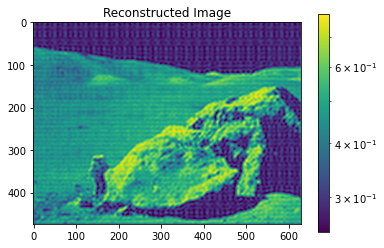

In [15]:
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.title('Reconstructed Image')
plt.imshow(np.abs(im_new), norm=LogNorm(vmin=0.25))
plt.colorbar()
plt.show()